###  In this assignment students need to predict whether a person makes over 50K per year or not from classic adult dataset using XGBoost. The description of the dataset is as follows:

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import pickle
from sklearn import datasets
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [2]:
# reading the features and the labels
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None)



In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [4]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain',
'capital_loss', 'hours_per_week', 'native_country', 'wage_class']

In [5]:
len(col_labels)

15

In [6]:
#Adding the feature names to the dataframe
data.columns = col_labels
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


### Attribute Information:

<h4>Listing of attributes: >50K, <=50K.

age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov,
Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school,
Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th,
Doctorate, 5th-6th, Preschool.
education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married,
Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-
managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct,

Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv,
Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative,
Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico,
Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan,
Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy,
Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France,
Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia,

Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-
Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.</h4>

In [7]:
data.wage_class.unique()

array([' <=50K.', ' >50K.'], dtype=object)

In [8]:
# Making the salray column to 0 or 1

In [9]:
sal={' <=50K.':0, ' >50K.':1}
data.wage_class=[sal[item] for item in data.wage_class]

In [10]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


In [11]:
data.shape

(16281, 15)

## Some Data Visulization

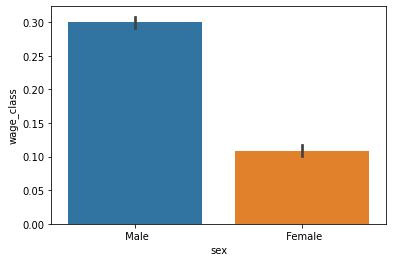

In [13]:
import seaborn as sns
#draw a bar plot of survival by Pclass
sns.barplot(x="sex", y="wage_class", data=data)

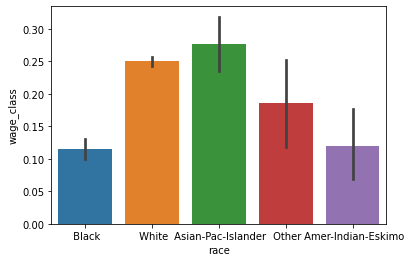

In [14]:
import seaborn as sns
#draw a bar plot of survival by Pclass
sns.barplot(x="race", y="wage_class", data=data)

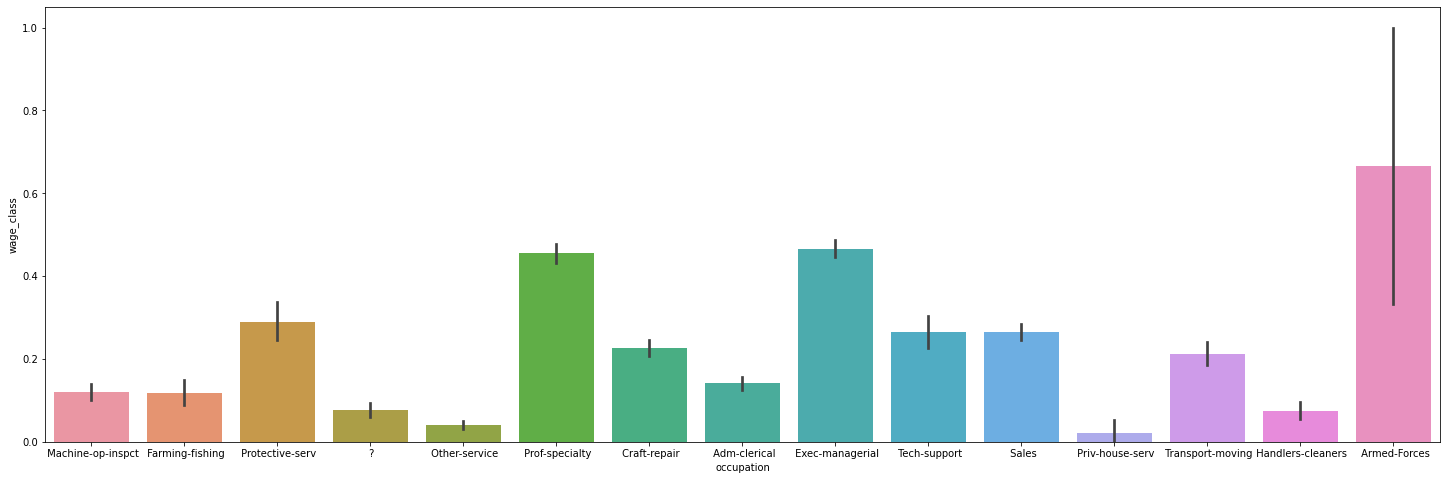

In [19]:
from matplotlib import pyplot as plt
import seaborn as sns
#draw a bar plot of survival by Pclass
plt.figure(figsize=(25,8))
sns.barplot(x="occupation", y="wage_class", data=data)

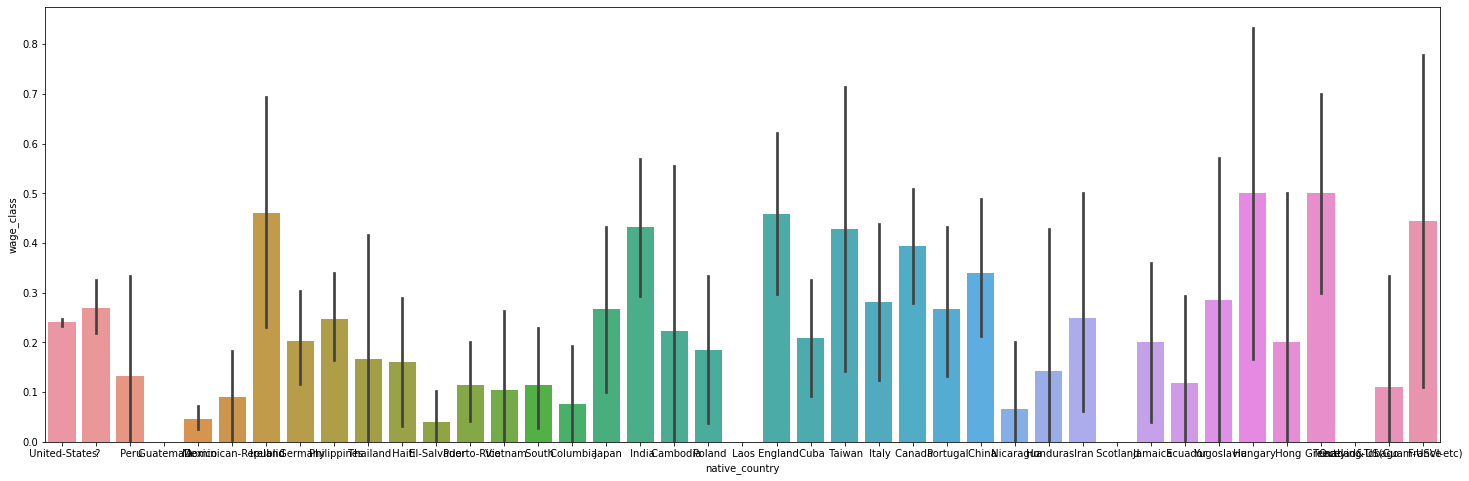

In [20]:
from matplotlib import pyplot as plt
import seaborn as sns
#draw a bar plot of survival by Pclass
plt.figure(figsize=(25,8))
sns.barplot(x="native_country", y="wage_class", data=data)

In [101]:
# Lets look at the workclass
data.workclass.unique()

array([' Private', ' Local-gov', ' ?', ' Self-emp-not-inc',
       ' Federal-gov', ' State-gov', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [115]:
indexNames = data[ data['workclass'] == ' ?' ].index
indexNames

Int64Index([    4,     6,    13,    22,    35,    75,    89,   100,   113,
              132,
            ...
            16006, 16018, 16032, 16035, 16117, 16121, 16208, 16239, 16251,
            16277],
           dtype='int64', length=963)

In [116]:


# Delete these row indexes from dataFrame
data.drop(indexNames , inplace=True)

In [117]:
data.workclass.unique()

array([' Private', ' Local-gov', ' Self-emp-not-inc', ' Federal-gov',
       ' State-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [118]:
data.education.unique()

array([' 11th', ' HS-grad', ' Assoc-acdm', ' Some-college', ' 10th',
       ' Prof-school', ' 7th-8th', ' Bachelors', ' Masters', ' Doctorate',
       ' 5th-6th', ' Assoc-voc', ' 9th', ' 12th', ' 1st-4th',
       ' Preschool'], dtype=object)

In [119]:
data.marital_status.unique()

array([' Never-married', ' Married-civ-spouse', ' Widowed', ' Separated',
       ' Divorced', ' Married-spouse-absent', ' Married-AF-spouse'],
      dtype=object)

In [120]:
data.occupation.unique()

array([' Machine-op-inspct', ' Farming-fishing', ' Protective-serv',
       ' Other-service', ' Prof-specialty', ' Craft-repair',
       ' Adm-clerical', ' Exec-managerial', ' Tech-support', ' Sales',
       ' Priv-house-serv', ' Transport-moving', ' Handlers-cleaners',
       ' Armed-Forces', ' ?'], dtype=object)

In [121]:
indexNames = data[ data['occupation'] == ' ?' ].index
indexNames

# Delete these row indexes from dataFrame
data.drop(indexNames , inplace=True)

In [122]:
data.relationship.unique()

array([' Own-child', ' Husband', ' Not-in-family', ' Unmarried', ' Wife',
       ' Other-relative'], dtype=object)

In [123]:
data.race.unique()

array([' Black', ' White', ' Asian-Pac-Islander', ' Other',
       ' Amer-Indian-Eskimo'], dtype=object)

In [124]:
data.sex.unique()

array([' Male', ' Female'], dtype=object)

In [125]:
data.native_country.unique()

array([' United-States', ' ?', ' Peru', ' Guatemala', ' Mexico',
       ' Dominican-Republic', ' Ireland', ' Germany', ' Philippines',
       ' Thailand', ' Haiti', ' El-Salvador', ' Puerto-Rico', ' Vietnam',
       ' South', ' Columbia', ' Japan', ' India', ' Cambodia', ' Poland',
       ' Laos', ' England', ' Cuba', ' Taiwan', ' Italy', ' Canada',
       ' Portugal', ' China', ' Nicaragua', ' Honduras', ' Iran',
       ' Scotland', ' Jamaica', ' Ecuador', ' Yugoslavia', ' Hungary',
       ' Hong', ' Greece', ' Trinadad&Tobago',
       ' Outlying-US(Guam-USVI-etc)', ' France'], dtype=object)

In [126]:
df = pd.get_dummies(data, columns=[
    "workclass", "education", "marital_status", "occupation", "relationship",
    "race", "sex", "native_country",
])

In [127]:
# checking for missing values
df.isna().sum()

age                                0
fnlwgt                             0
education_num                      0
capital_gain                       0
capital_loss                       0
                                  ..
native_country_ Thailand           0
native_country_ Trinadad&Tobago    0
native_country_ United-States      0
native_country_ Vietnam            0
native_country_ Yugoslavia         0
Length: 105, dtype: int64

In [128]:
df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,wage_class,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,25,226802,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5,34,198693,6,0,0,30,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [129]:
#Separating the feature and the Label columns 
x=df.drop(labels='wage_class', axis=1)
y= df['wage_class']

In [130]:
x.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,25,226802,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,34,198693,6,0,0,30,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [131]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=42)


In [132]:
model = XGBClassifier(objective='binary:logistic')
model.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [133]:
# cheking training accuracy
y_pred = model.predict(train_x)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(train_y,predictions)
accuracy

0.9266791044776119

In [134]:
# cheking initial test accuracy
y_pred = model.predict(test_x)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(test_y,predictions)
accuracy

0.8609357997823721

### Hyperparameter Tuning

In [135]:
# Now to increae the accuracy of the model, we'll do hyperparameter tuning using grid search
from sklearn.model_selection import GridSearchCV

In [136]:
param_grid={
   
    ' learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200]
    
}

In [137]:
grid= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid, verbose=3)

In [ ]:
grid.fit(train_x,train_y)

C:\Users\shrey\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


Fitting 3 folds for each of 80 candidates, totalling 240 fits
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.846, total=   0.2s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.855, total=   0.2s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.853, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.855, total=   0.5s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.866, total=   0.5s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.859, total=   0.5s
[CV]  learning_rate=1, max_depth=3, n_estimators=100 .................
[CV]   learning_rate=1, max_depth=3, n_estimators=100, score=0.858, total=   0.9s
[CV]  learning_rate=1, max_depth=3, n_estimators=100 .................
[CV]   learning_rate=1, max_depth=3, n_estimators=100, score=0.867, total=   0.9s
[CV]  learning_rate=1, max_depth=3, n_estimators=100 .................
[CV]   learning_rate=1, max_depth=3, n_estimators=100, score=0.861, total=   0.9s
[CV]  learning_rate=1, max_depth=3, n_estimators=200 .................
[CV]   learning_rate=1, max_depth=3, n_estimators=200, score=0.858, total=   1.9s
[CV

[CV]   learning_rate=0.5, max_depth=3, n_estimators=200, score=0.858, total=   2.3s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=200 ...............
[CV]   learning_rate=0.5, max_depth=3, n_estimators=200, score=0.863, total=   2.3s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=200 ...............
[CV]   learning_rate=0.5, max_depth=3, n_estimators=200, score=0.856, total=   2.1s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=10 ................
[CV]   learning_rate=0.5, max_depth=5, n_estimators=10, score=0.853, total=   0.2s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=10 ................
[CV]   learning_rate=0.5, max_depth=5, n_estimators=10, score=0.859, total=   0.2s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=10 ................
[CV]   learning_rate=0.5, max_depth=5, n_estimators=10, score=0.860, total=   0.2s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=50 ................
[CV]   learning_rate=0.5, max_depth=5, n_estimators=50, score=0.860, tota

[CV]   learning_rate=0.1, max_depth=5, n_estimators=10, score=0.860, total=   0.3s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=50 ................
[CV]   learning_rate=0.1, max_depth=5, n_estimators=50, score=0.860, total=   0.9s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=50 ................
[CV]   learning_rate=0.1, max_depth=5, n_estimators=50, score=0.857, total=   1.1s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=50 ................
[CV]   learning_rate=0.1, max_depth=5, n_estimators=50, score=0.859, total=   1.3s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=100 ...............
[CV]   learning_rate=0.1, max_depth=5, n_estimators=100, score=0.854, total=   2.3s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=100 ...............
[CV]   learning_rate=0.1, max_depth=5, n_estimators=100, score=0.851, total=   2.2s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=100 ...............
[CV]   learning_rate=0.1, max_depth=5, n_estimators=100, score=0.855, tota

In [73]:
# To  find the parameters givingmaximum accuracy
grid.best_params_

{' learning_rate': 1, 'max_depth': 3, 'n_estimators': 100}

In [74]:
# Create new model using the same parameters
new_model=XGBClassifier(learning_rate= 1, max_depth= 3, n_estimators= 100)
new_model.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [76]:
y_pred_new = new_model.predict(test_x)
predictions_new = [round(value) for value in y_pred_new]
accuracy_new = accuracy_score(test_y,predictions_new)
accuracy_new

0.8536335721596725